# Problem Statement
A telecom provider is collaborating with a micro-finance institution to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).In order to improve the selection of customers for the credit, the telecom provider wants some predictions that could help them in further investment and improvement in selection of customers.

Our task is to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

# Import Libraries

In [1]:
#data processing
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

#machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from scipy.stats import zscore

import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df=pd.read_csv('Data file.csv')

In [3]:
#checking the first 5 rows
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.shape

(209593, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

We have a dataset containing details of 209593 customers and 36 features.

Our target column 'label' indicates 0 for Defaulter and 1 for Non-Defaulter.

This makes it a classification problem where we are required to predict the probability of a customer being either Defaulter or a Non-Defaulter for a given loan transaction.

In [6]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
#checking null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

No null values in the dataset

In [9]:
#drop Unnamed column which seems to be an index column
df=df.drop(['Unnamed: 0'],axis=1)

In [10]:
#checking unique values in pcircle
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

Since 'UPW' value is static for all customers, it will not influence the outcome of our prediction models. Let us proceed to drop this column

In [11]:
#dropping pcircle feature
df=df.drop(['pcircle'],axis=1)

In [12]:
#Split Date into Day and Month attributes 
df["Day"] = df['pdate'].str.split('-').str[2].astype(int)
df["Month"] = df['pdate'].str.split('-').str[1].astype(int)
df.drop(["pdate"], axis = 1, inplace = True)

In [13]:
#dropping mobile number feature which contains unique values
df=df.drop(['msisdn'],axis=1)

In [14]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6


# EDA

In [15]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

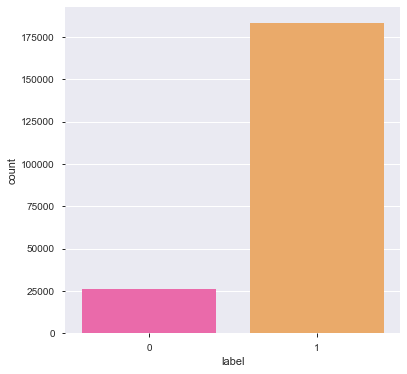

In [16]:
#Checking Countplot of Target variable 'label' 
plt.figure(figsize=(6,6))
sns.countplot(df["label"], palette='spring')
plt.show()
plt.savefig('Target-countplot.png')

We can see that target data is imbalanced with values concentrated largely in Non defaulters class as compared to Defaulters.

In [17]:
df['Month'].value_counts()

7    85765
6    83154
8    40674
Name: Month, dtype: int64

Text(0, 0.5, 'Number of Customers')

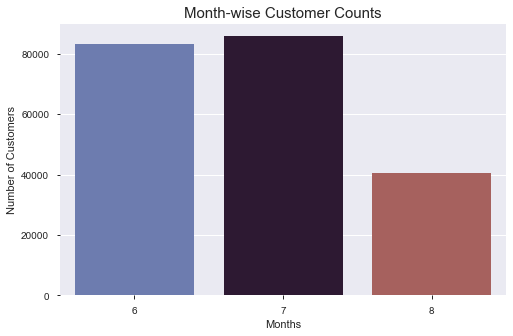

In [18]:
#checking month-wise data
plt.figure(figsize=(8, 5))
plt.title('Month-wise Customer Counts', size=15)
sns.countplot(df['Month'], palette="twilight")
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.savefig('Monthwise.png')

We notice the highest customer credits in the month of July and June. August has a relatively lower customer activity.

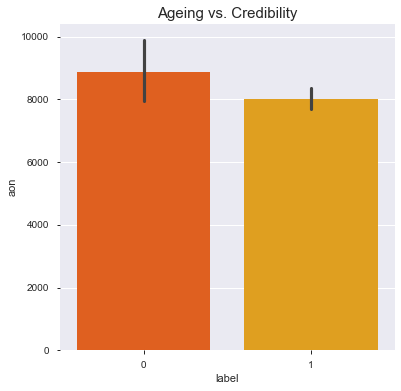

In [19]:
#checking relationship between age on network and customer loan status
plt.figure(figsize=(6,6))
sns.barplot(df['label'], df['aon'], palette='autumn')
plt.title('Ageing vs. Credibility', size=15)
plt.show()
plt.savefig('AgeonNet.png')

Higher the age on the network, better the customer credibility for paying back loans.

Let us now check the correlation between the various features.

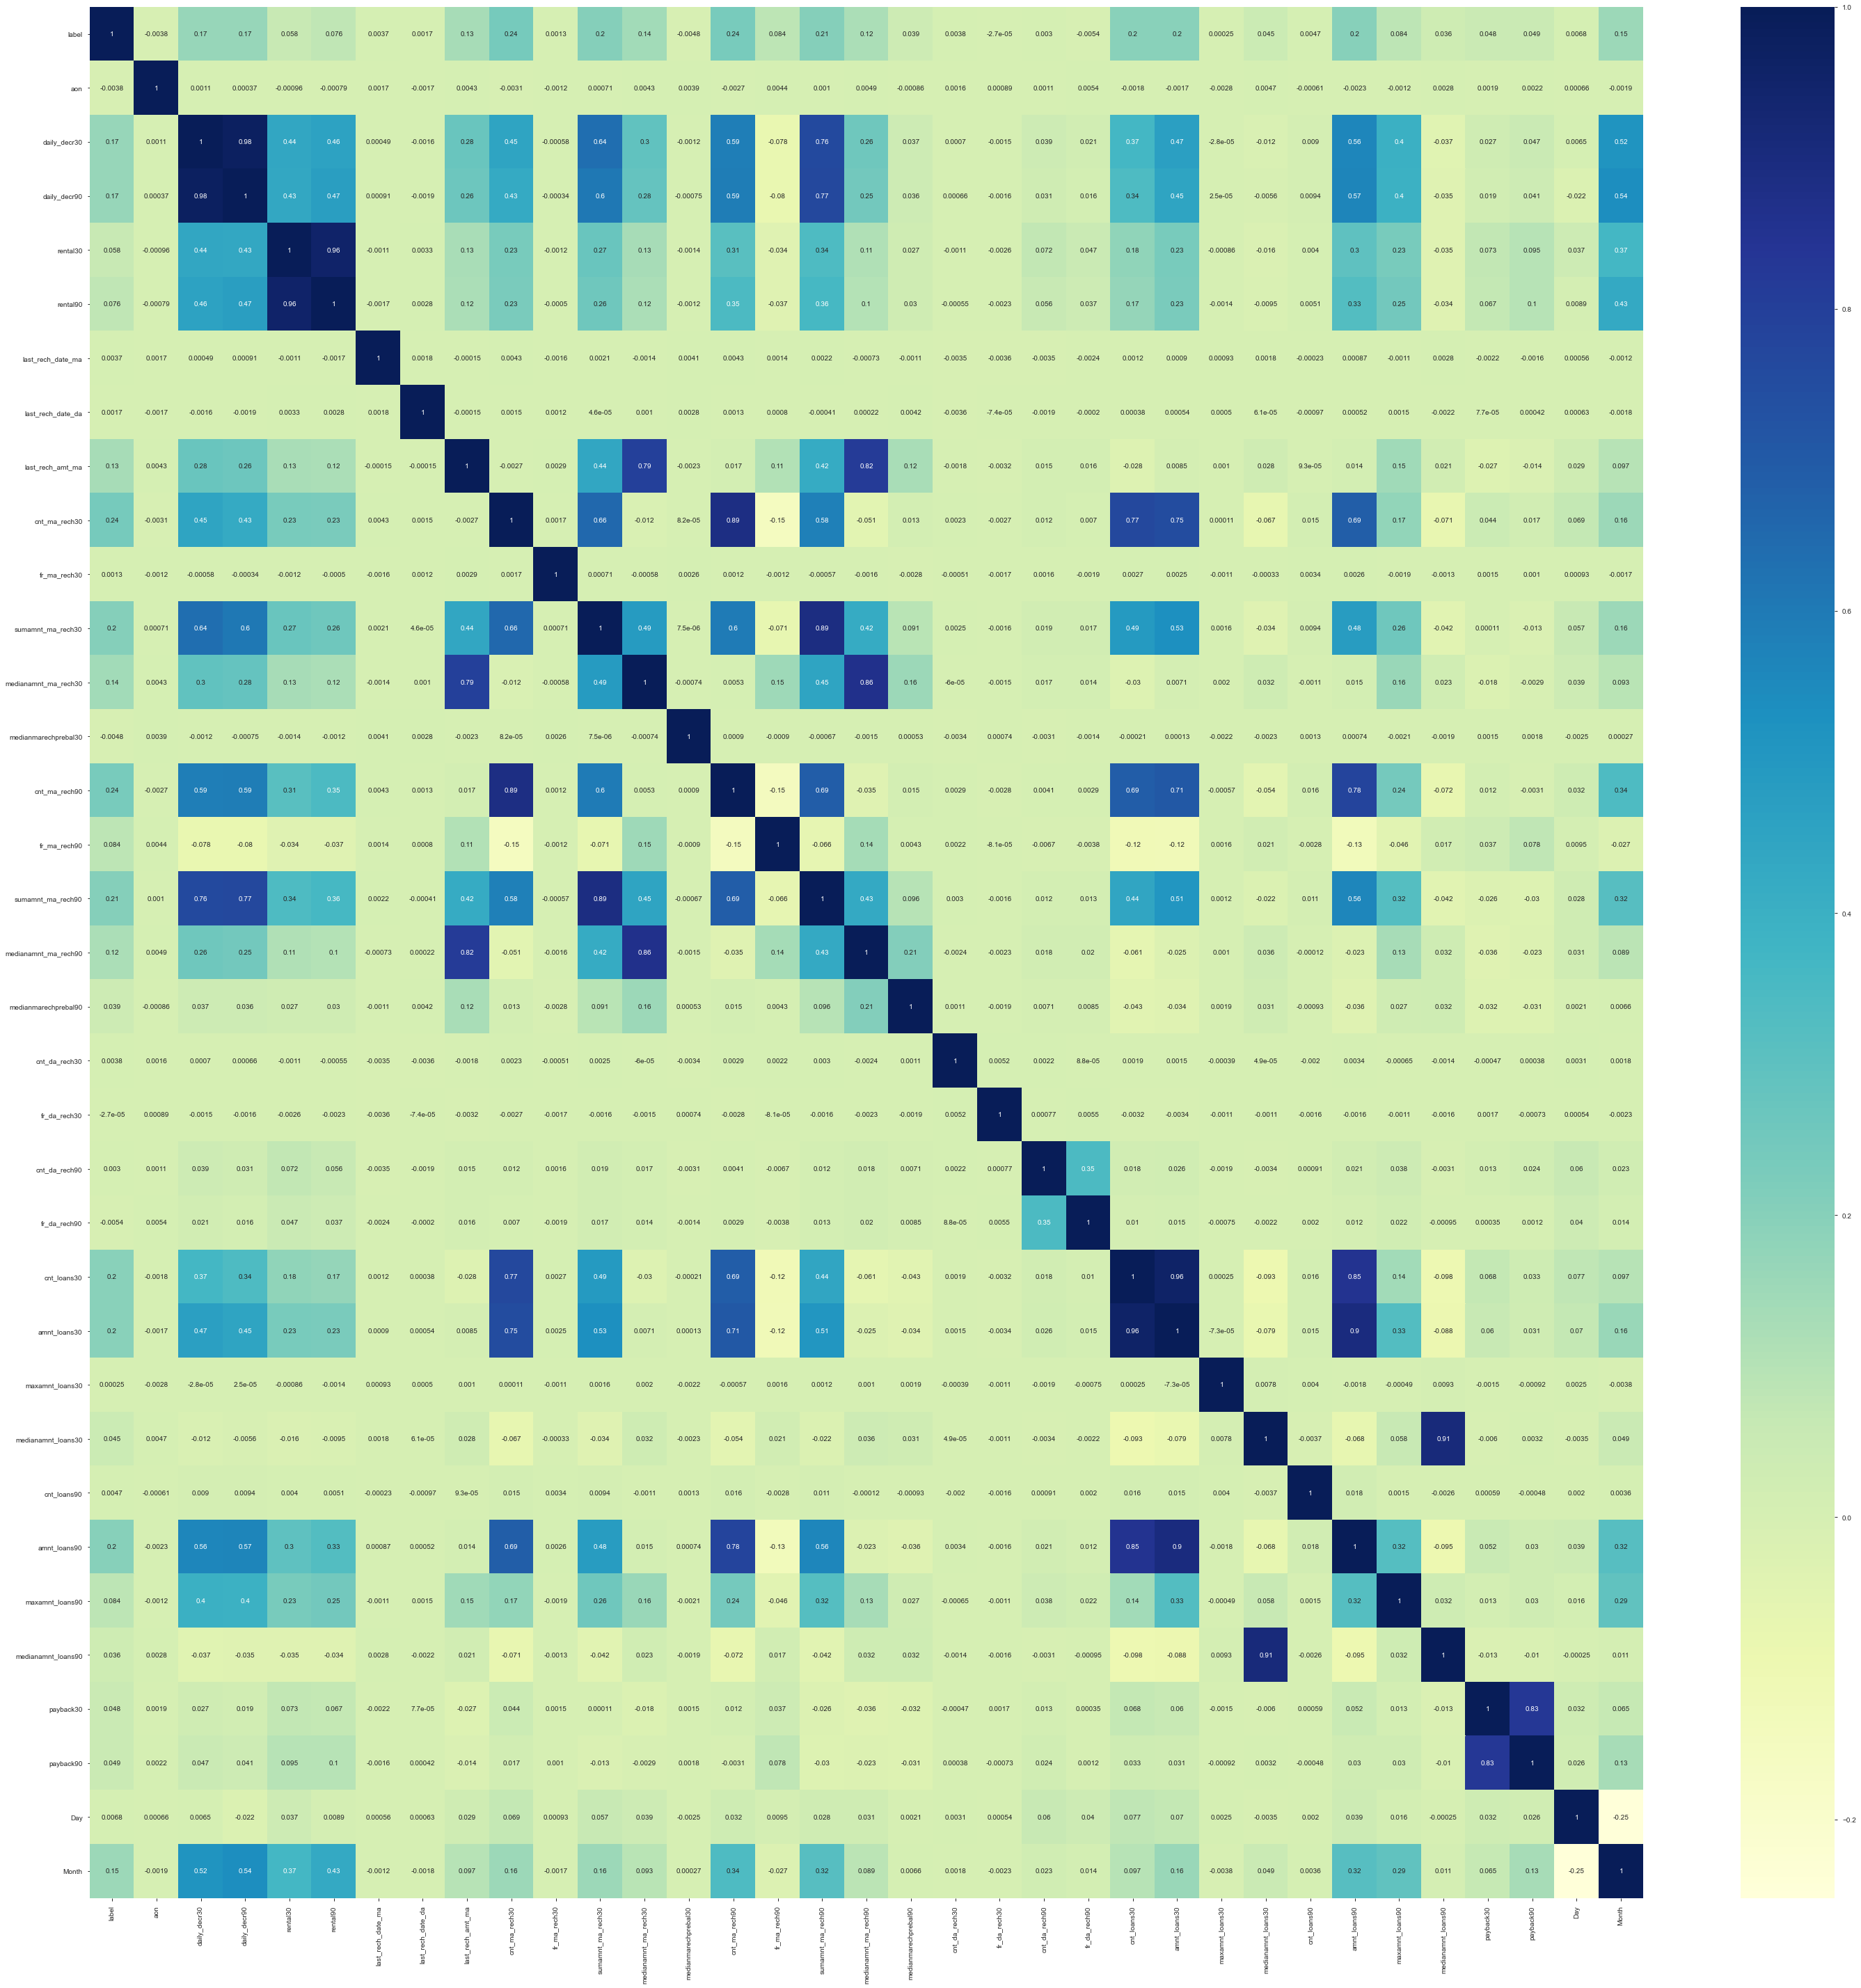

In [20]:
plt.subplots(figsize=(50,50))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.savefig('heatmap.png')

In [21]:
#checking correlation with each feature
df.corr()["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
Month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
Day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

We see that Number of recharges of main account has a direct positive relation to loan repayment whereas frequency of data recharge in 90 days has a weak negative relation.

Next, let us check the distribution of each attribute in the dataset.

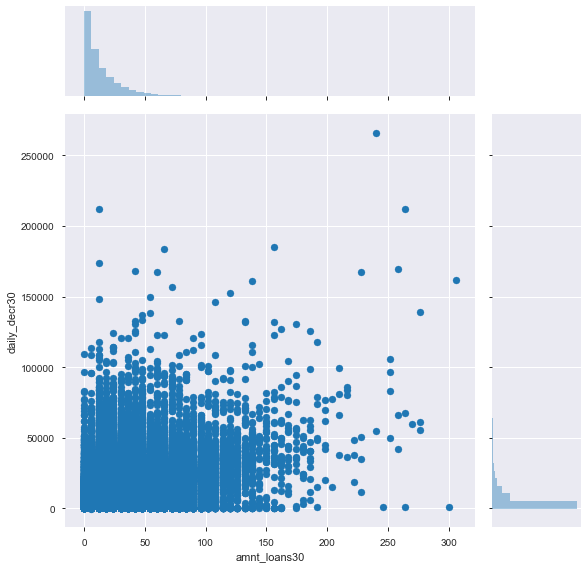

In [22]:
# joint plot between Total Loan Amt in 30 days and SalePrice
sns.jointplot(df["amnt_loans30"],df["daily_decr30"],ratio=4,height=8)
plt.savefig('Jointplot.png')

We see a slight linear relation between total amount of loan and daily main account balance used up in last 30 days

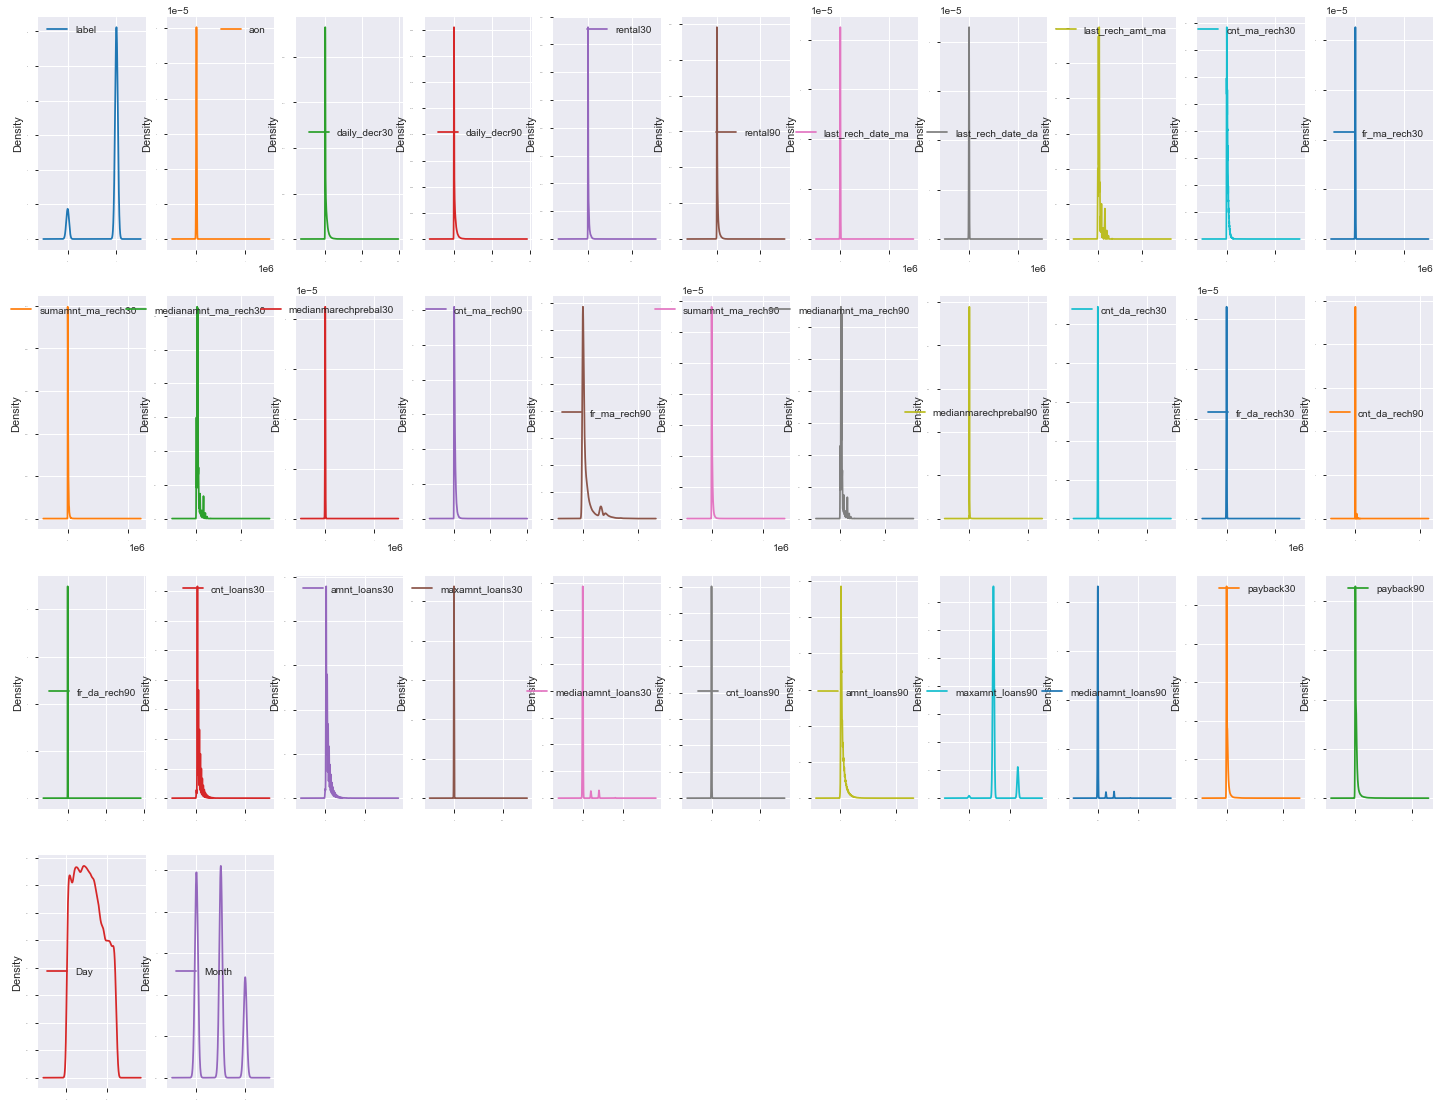

In [23]:
df.plot(kind='density', subplots=True, layout=(6,11), legend=True, sharex=False, fontsize=1, figsize=(25,30)) 
plt.show()
plt.savefig('density.png')

The dataset seems to have significant amount of outliers and skewness present with the distributions being far from a normal Gaussian distribution. We will need to remove this.

# Data Pre Processing

Handling Outliers

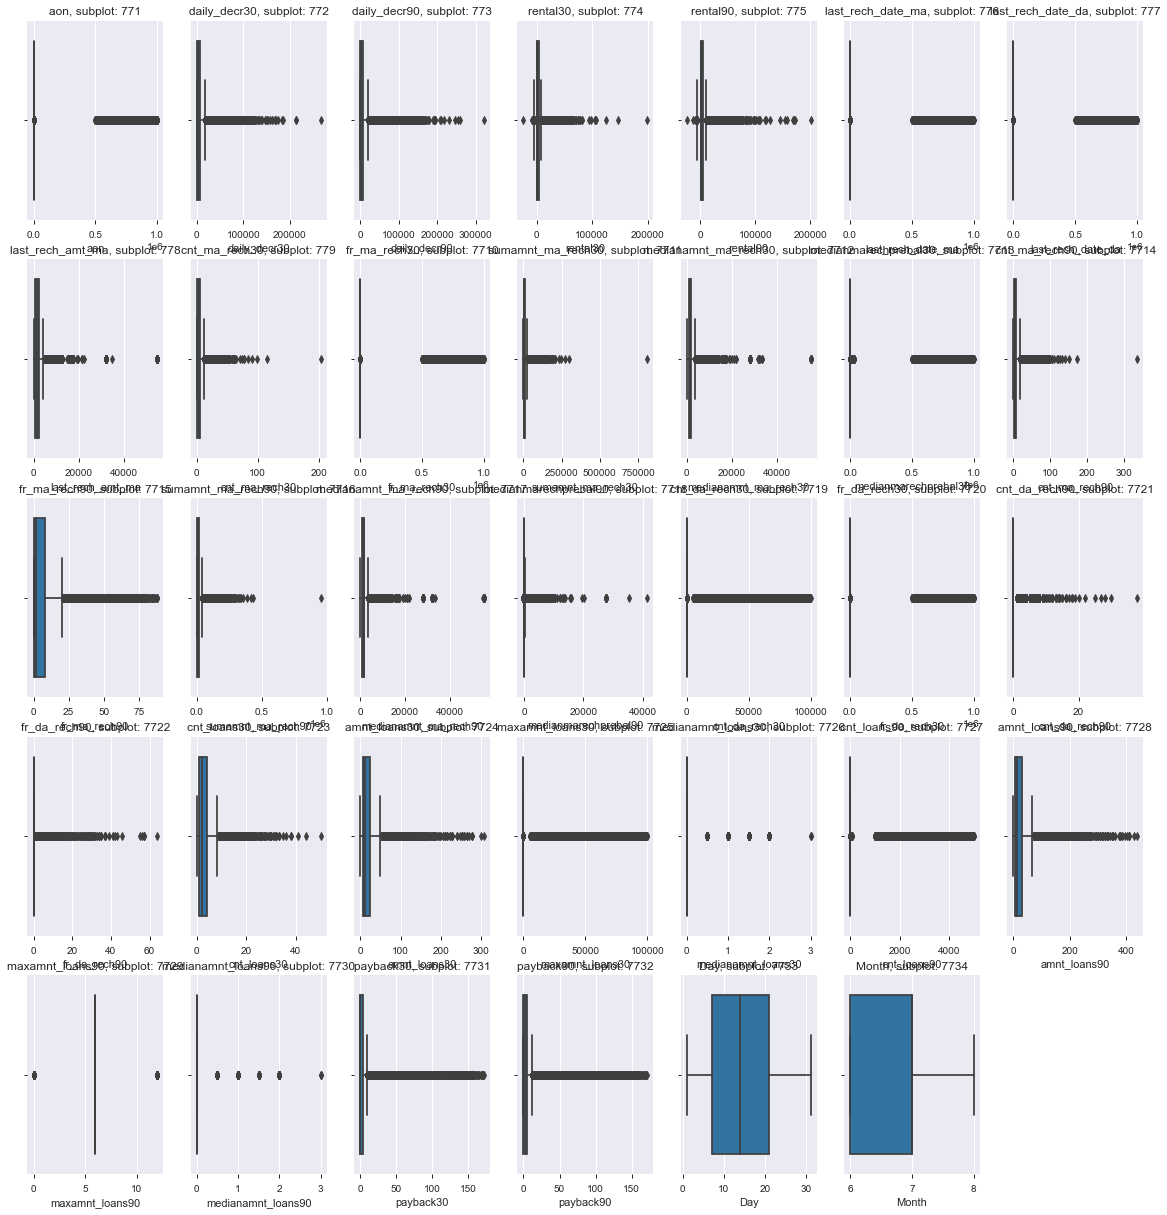

In [24]:
#Outlier check

cols = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month']

a = 7  # number of rows
b = 7  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,30))

for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1

plt.show()

In [25]:
df.shape

(209593, 35)

In [26]:
#calculate z-scores of x to remove outliers
z_scores = zscore(df) 
abs_z_scores = np. abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [27]:
df=new_df

Removing Skewness

In [28]:
#splitting dataframe into x and y
x = df.drop('label', axis = 1)
y = df['label']

In [29]:
x.skew().to_frame('Skewness Measure')

,Skewness Measure
aon,0.957902
daily_decr30,1.963747
daily_decr90,2.077637
rental30,2.194889
rental90,2.244866
last_rech_date_ma,3.099484
last_rech_date_da,10.384887
last_rech_amt_ma,2.125356
cnt_ma_rech30,1.175157
fr_ma_rech30,2.005139


In [30]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x, method='yeo-johnson')

In [31]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew() #skewness removed

aon                      0.311375
daily_decr30            -1.975956
daily_decr90            -2.103651
rental30                 0.203354
rental90                 0.226638
last_rech_date_ma        0.128919
last_rech_date_da      -59.301771
last_rech_amt_ma        -0.185419
cnt_ma_rech30           -0.026493
fr_ma_rech30             0.137760
sumamnt_ma_rech30       -0.457713
medianamnt_ma_rech30    -0.313429
medianmarechprebal30     2.010325
cnt_ma_rech90           -0.029894
fr_ma_rech90             0.142963
sumamnt_ma_rech90       -0.365043
medianamnt_ma_rech90    -0.175640
medianmarechprebal90     0.996401
cnt_da_rech30            9.767615
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              0.086124
amnt_loans30            -0.003122
maxamnt_loans30         -1.006589
medianamnt_loans30       5.355423
cnt_loans90              0.189967
amnt_loans90             0.123657
maxamnt_loans90          0.000000
medianamnt_loa

In [32]:
x=df_new

Scaling the dataset

In [33]:
#Scale the data in x
std = StandardScaler()
x = std.fit_transform(x)

Handling Data Imbalance using Oversampling

In [34]:
#!pip install imbalanced-learn

In [35]:
import imblearn

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
#apply smote technique
smote_sampling = SMOTE(random_state=42)
x,y =  smote_sampling.fit_resample(x,y)

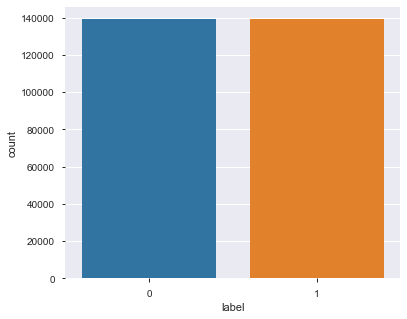

In [38]:
# Check if dataset is balanced now
plt.figure(figsize=(6,5))
sns.countplot(y)

# Model Building

Train Test Split

In [39]:
#creating train test split 
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=97)

Logistic Regression

In [40]:
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr= LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7805790056519926
[[27440  7286]
 [ 7971 26836]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     34726
           1       0.79      0.77      0.78     34807

    accuracy                           0.78     69533
   macro avg       0.78      0.78      0.78     69533
weighted avg       0.78      0.78      0.78     69533



In [41]:
#Randomised Searchcv
param = {"penalty" : ['l1', 'l2', 'none'],
"C" : [0.00001,0.001,0.01,0.05,0.1,0.5,0.8,1,3,5,7,8,10,12,15,18,20,25,30,50,100,120,130,145,200,300,400,500,1000,5000]}

LR_rcv = RandomizedSearchCV(LR,param_distributions=param,verbose=5,n_jobs=-1,cv=5,n_iter=20)
LR_rcv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1e-05, 0.001, 0.01, 0.05, 0.1,
                                              0.5, 0.8, 1, 3, 5, 7, 8, 10, 12,
                                              15, 18, 20, 25, 30, 50, 100, 120,
                                              130, 145, 200, 300, 400, 500,
                                              1000, 5000],
                                        'penalty': ['l1', 'l2', 'none']},
                   verbose=5)

In [42]:
LR_rcv.best_params_ 

{'penalty': 'l2', 'C': 0.8}

In [43]:
LR_rcv_pred=LR_rcv.best_estimator_.predict(x_test)

In [44]:
print(accuracy_score(y_test,LR_rcv_pred))
print(confusion_matrix(y_test,LR_rcv_pred))
print(classification_report(y_test,LR_rcv_pred))

0.7806796772755382
[[27418  7308]
 [ 7942 26865]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     34726
           1       0.79      0.77      0.78     34807

    accuracy                           0.78     69533
   macro avg       0.78      0.78      0.78     69533
weighted avg       0.78      0.78      0.78     69533



RandomForestClassifier

In [45]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9494772266405879
[[33122  1604]
 [ 1909 32898]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     34726
           1       0.95      0.95      0.95     34807

    accuracy                           0.95     69533
   macro avg       0.95      0.95      0.95     69533
weighted avg       0.95      0.95      0.95     69533



In [67]:
#Randomised Searchcv
params = {"n_estimators":[100,400,800],"criterion":["gini", "entropy"]
              ,"max_depth":[3,7,8],"min_samples_split":[2,10,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,5,6,7],"bootstrap":[True,False]}

RF_cv = RandomizedSearchCV(RF,param_distributions=params,n_iter=2,n_jobs=-1,cv=2,verbose=2)

RF_cv.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 6, 7],
                                        'min_samples_split': [2, 10, 25],
                                        'n_estimators': [100, 400, 800]},
                   verbose=2)

In [68]:
RF_cv.best_params_ 

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini',
 'bootstrap': True}

In [69]:
RF_cv_pred=RF_cv.best_estimator_.predict(x_test)

In [70]:
print(accuracy_score(y_test,RF_cv_pred))
print(confusion_matrix(y_test,RF_cv_pred))
print(classification_report(y_test,RF_cv_pred))

0.7810967454302273
[[27266  7460]
 [ 7761 27046]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     34726
           1       0.78      0.78      0.78     34807

    accuracy                           0.78     69533
   macro avg       0.78      0.78      0.78     69533
weighted avg       0.78      0.78      0.78     69533



 DecisionTreeClassifier

In [46]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9056850703982282
[[31735  2991]
 [ 3567 31240]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     34726
           1       0.91      0.90      0.91     34807

    accuracy                           0.91     69533
   macro avg       0.91      0.91      0.91     69533
weighted avg       0.91      0.91      0.91     69533



In [47]:
#Randomized Searchcv

params = {"max_depth" : [3,7,8,12] ,"max_features" : list(range(1,7)), "min_samples_leaf" : [1,5,7,8],
              "criterion" : ["gini", "entropy"] }

DT_cv = RandomizedSearchCV(dt,param_distributions=params,n_iter=25,n_jobs=-1,cv=8,verbose=2)

DT_cv.fit(x_train,y_train)

Fitting 8 folds for each of 25 candidates, totalling 200 fits


RandomizedSearchCV(cv=8, estimator=DecisionTreeClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 7, 8, 12],
                                        'max_features': [1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 5, 7, 8]},
                   verbose=2)

In [48]:
DT_cv.best_params_ 

{'min_samples_leaf': 8,
 'max_features': 4,
 'max_depth': 12,
 'criterion': 'entropy'}

In [49]:
DT_cv_pred=DT_cv.best_estimator_.predict(x_test)

In [50]:
print(accuracy_score(y_test,DT_cv_pred))
print(confusion_matrix(y_test,DT_cv_pred))
print(classification_report(y_test,DT_cv_pred))

0.8453683862338746
[[28647  6079]
 [ 4673 30134]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     34726
           1       0.83      0.87      0.85     34807

    accuracy                           0.85     69533
   macro avg       0.85      0.85      0.85     69533
weighted avg       0.85      0.85      0.85     69533



KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y_train)  
predknn = knn.predict(x_test)  
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8948988250183366
[[34270   456]
 [ 6852 27955]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     34726
           1       0.98      0.80      0.88     34807

    accuracy                           0.89     69533
   macro avg       0.91      0.90      0.89     69533
weighted avg       0.91      0.89      0.89     69533



In [52]:
#Randomized Searchcv

params = {"leaf_size":list(range(1,2)),"n_neighbors":list(range(1,2)),"p":[1,2]}

KN_cv = RandomizedSearchCV(knn,param_distributions=params,cv=2)

KN_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [1], 'n_neighbors': [1],
                                        'p': [1, 2]})

In [53]:
KN_cv.best_params_ 

{'p': 1, 'n_neighbors': 1, 'leaf_size': 1}

In [54]:
KN_cv_pred=KN_cv.best_estimator_.predict(x_test)

In [55]:
print(accuracy_score(y_test,KN_cv_pred))
print(confusion_matrix(y_test,KN_cv_pred))
print(classification_report(y_test,KN_cv_pred))

0.9372240518890311
[[34414   312]
 [ 4053 30754]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     34726
           1       0.99      0.88      0.93     34807

    accuracy                           0.94     69533
   macro avg       0.94      0.94      0.94     69533
weighted avg       0.94      0.94      0.94     69533



GradientBoostingClassifier

In [56]:
GB = GradientBoostingClassifier() 
GB.fit(x_train, y_train)  
predgb = GB.predict(x_test)  
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.897746393798628
[[31538  3188]
 [ 3922 30885]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     34726
           1       0.91      0.89      0.90     34807

    accuracy                           0.90     69533
   macro avg       0.90      0.90      0.90     69533
weighted avg       0.90      0.90      0.90     69533



In [57]:
#Randomized Searchcv

parameters = {"n_estimators":[100,500,900],"learning_rate":[0.01,0.3,0.7]
              ,"max_depth":[3,7,12],"min_samples_split":[2,12,20],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,5,8]}

GB_cv = RandomizedSearchCV(GB,param_distributions=parameters,n_iter=2,n_jobs=-1,cv=2,verbose=2)

GB_cv.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.3, 0.7],
                                        'max_depth': [3, 7, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 8],
                                        'min_samples_split': [2, 12, 20],
                                        'n_estimators': [100, 500, 900]},
                   verbose=2)

In [58]:
GB_cv.best_params_ 

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 3,
 'learning_rate': 0.7}

In [59]:
GB_cv_pred=GB_cv.best_estimator_.predict(x_test)

In [60]:
print(accuracy_score(y_test,GB_cv_pred))
print(confusion_matrix(y_test,GB_cv_pred))
print(classification_report(y_test,GB_cv_pred))

0.9465146045762444
[[32469  2257]
 [ 1462 33345]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     34726
           1       0.94      0.96      0.95     34807

    accuracy                           0.95     69533
   macro avg       0.95      0.95      0.95     69533
weighted avg       0.95      0.95      0.95     69533



XGBClassifier

In [61]:
XGB = XGBClassifier() 
XGB.fit(x_train, y_train)  
predxg = XGB.predict(x_test)  
print(accuracy_score(y_test,predxg))
print(confusion_matrix(y_test,predxg))
print(classification_report(y_test,predxg))

[22:30:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9478952439848705
[[32689  2037]
 [ 1586 33221]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     34726
           1       0.94      0.95      0.95     34807

    accuracy                           0.95     69533
   macro avg       0.95      0.95      0.95     69533
weighted avg       0.95      0.95      0.95     69533



In [63]:
#Randomised Searchcv

paramsdist = {"n_estimators":[100,300,700],"learning_rate":[0.001,0.02,0.7],
              "max_depth":[3,5,7,10,12,15],"gamma":[0.001,0.1,3],"reg_alpha":[0,0.1,0.7],
              "reg_lambda":[1,10,80,150]}

XG_cv = RandomizedSearchCV(XGB,param_distributions=paramsdist,n_jobs=-1,n_iter=2,cv=2,verbose=5)

XG_cv.fit(x_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[22:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...ree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           s

In [64]:
XG_cv.best_params_ 

{'reg_lambda': 10,
 'reg_alpha': 0,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.7,
 'gamma': 0.001}

In [65]:
XG_cv_pred=XG_cv.best_estimator_.predict(x_test)

In [66]:
print(accuracy_score(y_test,XG_cv_pred))
print(confusion_matrix(y_test,XG_cv_pred))
print(classification_report(y_test,XG_cv_pred))

0.9490026318438727
[[32711  2015]
 [ 1531 33276]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     34726
           1       0.94      0.96      0.95     34807

    accuracy                           0.95     69533
   macro avg       0.95      0.95      0.95     69533
weighted avg       0.95      0.95      0.95     69533



# Conclusion

Saving the best model

Though F1 score post hyper parameter tuning for both Gradient Boosting Classifier model as well as XG Boost Classifier model is 95%, the accuracy score for XGB is pegged slightly higher at 94.90%. 
Hence, we will be saving this tuned model to a pickle file.

In [71]:
import joblib
joblib.dump(XG_cv.best_estimator_,"MicroCredit.pkl")

['MicroCredit.pkl']